1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.cluster import KMeans

# 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [37]:
iris = load_iris()

In [38]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [39]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names).iloc[:, 0:2]
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [40]:
variety = iris.target
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 3. Разделите данные на выборку для обучения и тестирования

In [41]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25)

# 4. Постройте модель LDA

In [42]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [43]:
lda = LinearDiscriminantAnalysis()

In [44]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [45]:
# делаем прогноз на тестовой выборке
predict_X_test = lda.predict(X_test)

In [46]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, predict_X_test]).T
result

,0,1
0,2,1
1,2,2
2,2,2
3,1,2
4,2,2
5,1,2
6,1,1
7,2,2
8,0,0
9,0,0


In [47]:
from sklearn.metrics import accuracy_score

In [48]:
# расчёт точности
accuracy_score(y_test, predict_X_test)

0.7631578947368421

In [19]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-5.96577506,  7.63528063],
       [ 1.56994334, -4.37187929],
       [ 4.33303447, -3.5374192 ]])

# 5. Визуализируйте предсказания для тестовой выборки и центры классов

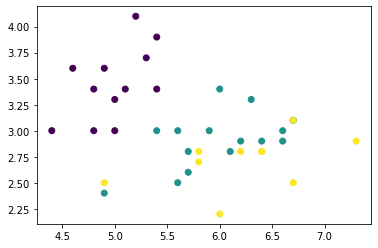

In [20]:
# визуализируем предсказания для тестовой выборки
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.show()

In [21]:
# Вычислим центроиды
lda.means_

array([[5.01052632, 3.42105263],
       [5.89411765, 2.7       ],
       [6.68      , 3.04      ]])

In [22]:
# Задаём colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

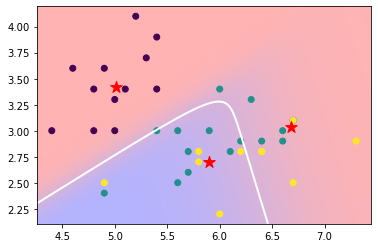

In [23]:
# сам scatter plot
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes', norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

Класс 0 хорошо отделяется, классы 1 и 2 плохо отделяются друг от друга.

# 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [24]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [27]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X_train)

# 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [28]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0])

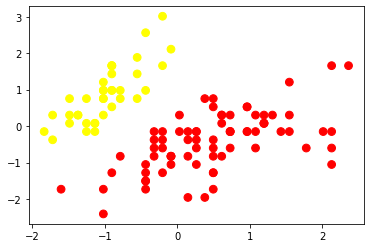

In [29]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

2 класса разделяются хорошо

In [30]:
# строим график локтя
# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

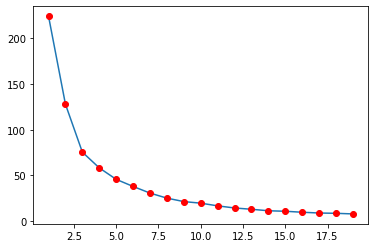

In [31]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Оптимальное количество классов по методу локтя - 3

In [51]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0,
       2, 0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0,
       0, 0])

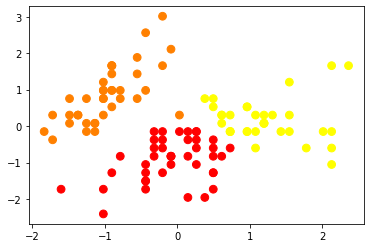

In [52]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

Класс 0 хорошо отделяется, классы 1 и 2 плохо отделяются друг от друга.